In [65]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [66]:
global_save_image=False
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/REDUCED_CARDINALITY"
directorios_de_datos="../../data/processed"

In [67]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado.csv")
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13


In [68]:
df[(df["Job Title"].str.contains("Directory"))]

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description
2144,Active Directory Data Migration Analyst,$55K-$101K (Glassdoor est.),3.4,Kelly IT,"Seattle, WA","Seattle, WA",501 to 1000 employees,1979,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,55.0,101.0,78.0,44


In [69]:
def graph_continues_types(df,colName,save_image_dir=None,save_image_file=None,image_dpi=300):
    fig,ax = plt.subplots(2,2,figsize=(8,6))
    fig.autofmt_xdate()
    sns.histplot(data=df,x=colName,kde=True,ax=ax[0,0]) #visualiza densidad de kernel
    sns.boxplot(x=df[colName],ax=ax[0,1],showmeans=True)
    sns.barplot(data=df, y=colName,err_kws={'color': 'orange'},ax=ax[1,0])
    sns.violinplot(x=df[colName],ax=ax[1,1]) # por defecto dibuja un boxplot en miniatura
    if global_save_image == True and save_image_dir!=None and save_image_file !=None:
        plt.savefig(f"{save_image_dir}/{save_image_file}_hist_box_bar_violing.jpg", dpi=image_dpi, transparent=False, bbox_inches='tight')

In [70]:
def getDataFrameValueCounts(data,columna,normalize=False):
    return data[columna].value_counts(normalize=normalize).to_frame().reset_index()

In [71]:
def agruparData_value_counts(data,columna,minimo_para_agrupar,fila_mensaje="Agrupacion",normalize=False):
    if normalize:
        count_col_name='proportion'
    else:
        count_col_name='count'
    agrupacion_count=data[(data[count_col_name]<minimo_para_agrupar)][count_col_name].sum()
    tmp_df = pd.DataFrame([[fila_mensaje,agrupacion_count]], columns=[columna,count_col_name])
    tmd_df=pd.concat([tmp_df, data[(data[count_col_name]>=minimo_para_agrupar)]])
    tmd_df=tmd_df.reset_index(drop=True)
    return tmd_df

In [72]:
def graf_conteo_de_valores(data,columna:str,xlabel=None,yLabel=None,title=None,orient='h',getValueCounts=True,normalize=False,return_value=False,save_image_dir=None,save_image_file=None,image_dpi=300):
    if getValueCounts:
        value_counts=getDataFrameValueCounts(data,columna,normalize)
    else:
        value_counts=data
    
    if normalize:
        count_col_name='proportion'
    else:
        count_col_name='count'

        
    ax=sns.barplot(x=count_col_name,hue=columna,y=columna,data=value_counts,orient = orient,palette='Set2',legend=False)
    if xlabel !=None:
        ax.set_xlabel(xlabel)
    if yLabel !=None:
        ax.set_ylabel(yLabel)
    if title !=None:
        ax.set_title(title)

    if global_save_image == True and global_save_image == True and save_image_dir!=None and save_image_file !=None:
        plt.savefig(f"{save_image_dir}/{save_image_file}_{count_col_name}.jpg", dpi=image_dpi, transparent=False, bbox_inches='tight')
    
    plt.show()
    if return_value:
        return value_counts

In [73]:
def graf_conteo_de_valores_grupados(data,columna,minimo_para_agrupar,fila_mensaje="Agrupacion",xlabel=None,yLabel=None,title=None,orient='h',normalize=False,return_value=False,save_image_dir=None,save_image_file=None,image_dpi=300):
    value_counts=agruparData_value_counts(getDataFrameValueCounts(data,columna,normalize),columna,minimo_para_agrupar,fila_mensaje,normalize=normalize)
    return graf_conteo_de_valores(value_counts,columna,xlabel,yLabel,title,orient,normalize=normalize,getValueCounts=False,return_value=return_value,save_image_dir=save_image_dir,save_image_file=save_image_file,image_dpi=image_dpi)
  

In [74]:
location=getDataFrameValueCounts(df,'Location')

In [75]:
location

,Location,count
0,"New York, NY",310
1,"Chicago, IL",130
2,"San Francisco, CA",119
3,"Austin, TX",81
4,"Los Angeles, CA",80
...,...,...
248,"Carrollton, TX",1
249,"Tarrant, TX",1
250,"Addison, TX",1
251,"Burr Ridge, IL",1


In [76]:
def getState(x:str):

    return x.split(",")[-1].strip()

In [77]:
location["Location state"]=  location["Location"].apply(getState)

In [78]:
location["Location state"].value_counts()

Location state
CA    74
TX    30
PA    26
NJ    26
IL    19
NY    13
CO    12
VA    10
UT     7
WA     7
AZ     7
IN     6
OH     4
NC     4
FL     3
KS     2
DE     1
GA     1
SC     1
Name: count, dtype: int64

In [79]:
headquarters =getDataFrameValueCounts(df,'Headquarters')

In [80]:
headquarters

,Headquarters,count
0,"New York, NY",224
1,"San Francisco, CA",78
2,"Chicago, IL",77
3,"Woodridge, IL",58
4,"Los Angeles, CA",56
...,...,...
493,"Burr Ridge, IL",1
494,"Saint Paul, MN",1
495,"Oak Brook, IL",1
496,"Bridgeview, IL",1


In [81]:
headquarters["Headquarters state"]=  headquarters["Headquarters"].apply(getState)

In [82]:
headquarters["Headquarters state"]

0      NY
1      CA
2      IL
3      IL
4      CA
       ..
493    IL
494    MN
495    IL
496    IL
497    CO
Name: Headquarters state, Length: 498, dtype: object

In [83]:
headquarters[(headquarters["Headquarters state"].str.len()>2)]

,Headquarters,count,Headquarters state
18,"London, United Kingdom",20,United Kingdom
29,"Tokyo, Japan",13,Japan
42,"Paris, France",10,France
43,"Bengaluru, India",10,India
75,"Singapore, Singapore",7,Singapore
89,"Toronto, Canada",5,Canada
105,"Mumbai, India",5,India
136,"Hyderabad, India",3,India
138,"Bishnupur , India",3,India
140,"Frankfurt am Main, Germany",3,Germany


In [84]:
def getCountry(x:str):
    country:str=x.split(",")[-1].strip()
    if len(country) <=3:
        country="United States"
    return country

In [85]:
getCountry('Brentford, United Kingdom')

'United Kingdom'

In [86]:
getCountry('New York, 061')

'United States'

In [87]:
headquarters["Headquarters country"]=  headquarters["Headquarters"].apply(getCountry)

In [88]:
headquarters["Headquarters country"].value_counts(normalize=True)

Headquarters country
United States     0.885542
United Kingdom    0.018072
India             0.016064
Canada            0.016064
Switzerland       0.010040
Australia         0.008032
France            0.006024
Germany           0.006024
Japan             0.004016
Portugal          0.004016
Netherlands       0.002008
Norway            0.002008
Malta             0.002008
Ukraine           0.002008
Brazil            0.002008
South Korea       0.002008
Cyprus            0.002008
Finland           0.002008
Austria           0.002008
Luxembourg        0.002008
Ireland           0.002008
Singapore         0.002008
Taiwan            0.002008
Name: proportion, dtype: float64

In [89]:
def getCountry2options(x:str):
    country:str=x.split(",")[-1].strip()
    if len(country) <=3:
        country="United States"
    else:
        country="Other"
    return country

In [90]:
headquarters["Headquarters country"]=  headquarters["Headquarters"].apply(getCountry2options)

In [91]:
headquarters["Headquarters country"].value_counts(normalize=True)

Headquarters country
United States    0.885542
Other            0.114458
Name: proportion, dtype: float64

- Junior: Typically has less than two years of experience and is just starting their career
- Associate: Typically has two to five years of experience, Same as Level II
- Mid-level: Typically has five to ten years of experience
- Senior: Typically has more than ten years of experience and in-depth knowledge of their field
- Lead: Supervises a team of employees
- Manager: Has overall responsibility for a department or division
- Director: Has overall responsibility for a business unit or function
- Executive: Has overall responsibility for the company 


In [92]:
Job_Title=getDataFrameValueCounts(df,'Job Title')

In [93]:
Job_Title

,Job Title,count
0,Data Analyst,405
1,Senior Data Analyst,90
2,Junior Data Analyst,30
3,Business Data Analyst,28
4,Sr. Data Analyst,21
...,...,...
1267,Data Analyst – Level II,1
1268,Data Analyst/Programmer,1
1269,Data Services Business Analyst 2,1
1270,Call Center Data Analyst,1


In [94]:
Job_Title[(Job_Title["Job Title"].str.contains('Entry'))]


,Job Title,count
187,Entry Level / Jr. Data Analyst,2
289,Data Analyst - Retail (Entry Level),1
618,Data Analyst/Data Entry/Federal Data Entry/Dat...,1
892,Data Analyst Entry Level,1
917,Entry Level Data Analyst,1
941,Data Entry Clerk / Data analyst,1
1024,Accounts Receivable Analyst (Data Entry),1
1054,Data Collector/Analyst (Entry Level),1
1095,Data Analyst - Entry Level,1
1145,Data Entry Analyst,1


In [95]:
Job_Title[(Job_Title["Job Title"].str.contains('Junior'))]

,Job Title,count
2,Junior Data Analyst,30
5,Data Analyst Junior,17
68,Data Analyst â Junior,2
302,SWRMC Assessments Junior Data Analyst,1
444,Junior Data Analyst Python,1
488,Data Analyst - Junior,1
574,Junior Data Warehouse Analyst,1
805,Data Analyst (Navy) - Mid and Junior Level,1
961,Junior Data Analytics Solutions Analyst,1
964,Data Analyst-Junior Profiles also works-Only N...,1


In [96]:
Job_Title[(Job_Title["Job Title"].str.contains('Jr'))]

,Job Title,count
137,Jr. Data Analyst,2
187,Entry Level / Jr. Data Analyst,2
211,Jr. Software Data/Operations Analyst Opportuni...,1
345,Data/Business Solutions Analyst - Jr,1
368,Jr. Data Warehouse Systems Analyst,1
782,Jr Management Analyst (Data Management),1
846,Jr Data Analyst,1
1007,Jr. Analyst Data/Reporting,1
1074,"Jr. Data Analyst, Master Data",1
1140,Jr. Data Analyst (Jr. DA),1


In [97]:
Job_Title[(Job_Title["Job Title"].str.contains('Sr.'))]

,Job Title,count
4,Sr. Data Analyst,21
15,Sr Data Analyst,9
49,Sr. Data Governance Analyst,3
70,Sr Data Business Analyst - FacilitySource,2
105,Sr. Enterprise BI Data Analyst,2
...,...,...
1230,Sr. Sales Operations & Data Analyst,1
1234,Sr. BI Data Analyst / QlikSense,1
1244,Sr. Data Analyst — US Safety,1
1251,"Sr Analyst, Data",1


In [98]:
Job_Title[(Job_Title["Job Title"].str.contains('Senior'))]

,Job Title,count
1,Senior Data Analyst,90
25,Senior Healthcare Data Analyst,5
34,Senior Contract Data Analyst,4
38,Senior Data Quality Analyst,4
46,Senior Product Data Analyst,3
...,...,...
1247,Senior Global Data Analyst / Power BI Dashboar...,1
1253,Senior Clinical Data Analyst,1
1261,"Senior Data Analyst, Business Intelligence",1
1264,Senior Research Data Analyst,1


In [99]:
Job_Title[(Job_Title["Job Title"].str.contains('Mid'))]

,Job Title,count
322,"Mid Level Data Analyst / BI Engineer - Looker,...",1
665,Mid-Level Data Analyst,1
789,Mid Data Analyst,1
805,Data Analyst (Navy) - Mid and Junior Level,1
808,Data Analyst (Navy) - Mid Level,1
971,Data Analytics Solutions Analyst - Mid with Se...,1
1100,Data Analyst - Mid-Level,1
1185,Mid-Senior Data Analyst,1


In [100]:
Job_Title[(Job_Title["Job Title"].str.contains('Lead'))]

,Job Title,count
9,Lead Data Analyst,15
64,Lead Data Analyst (Product),2
72,"Lead Data Analyst, BI/Visualizations",2
78,"Lead Data Analyst, Product",2
153,Data Center Migration PMO Analyst/PMO Lead,2
167,Lead Geophysical Data Analyst,2
191,Digital S/W Eng Lead Analyst (Big data with SA...,1
250,Research & Data Analyst Lead,1
269,Data Analyst Lead (Customer and Reservations),1
324,"Lead Analyst, Data Transfer, Integration & Qua...",1


In [101]:
Job_Title[(Job_Title["Job Title"].str.contains('Director'))]

,Job Title,count
73,Business Data Analyst - Senior/Director,2
481,Business Data Analyst - Senior/Director : 20,1
539,Active Directory Data Migration Analyst,1
654,Business Data Analyst - Senior/Director - Work...,1


In [102]:
Job_Title[(Job_Title["Job Title"].str.contains('Level'))]

,Job Title,count
187,Entry Level / Jr. Data Analyst,2
289,Data Analyst - Retail (Entry Level),1
322,"Mid Level Data Analyst / BI Engineer - Looker,...",1
525,"Senior Data Analyst, Tax Technology (Level 6)",1
580,Systems Engineer - Data Analyst (Level 3),1
665,Mid-Level Data Analyst,1
805,Data Analyst (Navy) - Mid and Junior Level,1
808,Data Analyst (Navy) - Mid Level,1
892,Data Analyst Entry Level,1
917,Entry Level Data Analyst,1


In [103]:
import re

In [104]:
def isDirector(text:str) ->bool:
    result = re.search("Director|director",text)
    if result:
        return True
    else:
        return False

In [105]:
def isLeadAnalyst(text:str) ->bool:
    result = re.search("Lead|lead",text)
    if result:
        return True
    else:
        return False

In [106]:
def isJrDataAnalyst(text:str) ->bool:
    result = re.search("Entry|entry|Jr|jr",text)
    if result:
        return True
    else:
        return False

In [107]:
def isSrDataAnalyst(text:str) ->bool:
    result = re.search("Senior|senior|Sr|sr",text)
    if result:
        return True
    else:
        return False

In [108]:
def isMidDataAnalyst(text:str) ->bool:
    result = re.search("Mid|mid|Level 3|Level III",text)
    if result:
        return True
    else:
        return False

In [109]:
def reduceCategoriesJobTitle(text:str):
    type_of_data_analyst=""
    if isDirector(text):
        type_of_data_analyst = "Director"
    elif isLeadAnalyst(text):
        type_of_data_analyst = "Lead"
    elif isSrDataAnalyst(text):
        type_of_data_analyst = "Senior"
    elif isJrDataAnalyst(text):
        type_of_data_analyst = "Junior"
    elif isMidDataAnalyst(text):
        type_of_data_analyst = "Middle"
    else:
        type_of_data_analyst =  "Associate"
    
    return type_of_data_analyst + " Data Analyst"

    

In [110]:
Job_Title["Job Title Cat"]=  Job_Title["Job Title"].apply(reduceCategoriesJobTitle)

In [111]:
Job_Title["Job Title Cat"].value_counts()

Job Title Cat
Associate Data Analyst    948
Senior Data Analyst       249
Lead Data Analyst          41
Junior Data Analyst        22
Middle Data Analyst         8
Director Data Analyst       4
Name: count, dtype: int64

# Reduccion de categorias en el dataset original

## Localizacion por estado

In [112]:
df["Location State"]=  df["Location"].apply(getState)

## sede por Pais

In [113]:
df["Headquarters Country"]=  df["Headquarters"].apply(getCountry)

In [114]:
df["Headquarters Country2"]=  df["Headquarters"].apply(getCountry2options)

In [115]:
companyName=getDataFrameValueCounts(df,'Company Name')

In [116]:
companyName

,Company Name,count
0,"Staffigo Technical Services, LLC",58
1,Diverse Lynx,22
2,Kforce,19
3,Lorven Technologies Inc,19
4,Mondo,14
...,...,...
1497,"Fast Switch, LTD",1
1498,El Hogar del Nino - The Home of the Child,1
1499,Empire Today,1
1500,Numerator,1


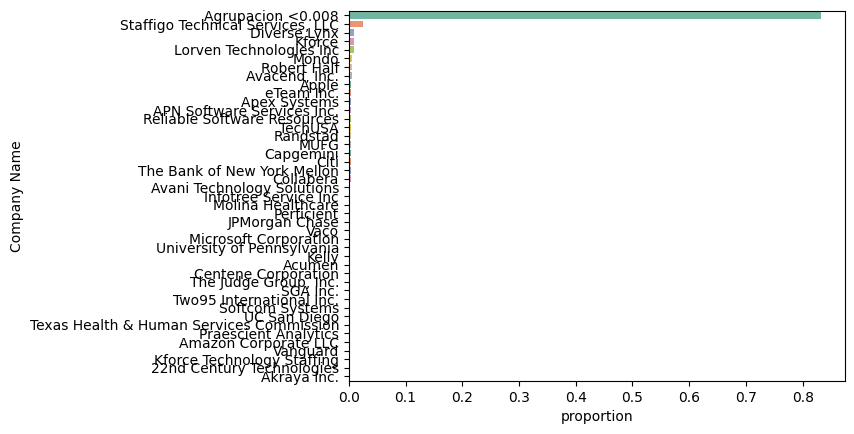

,Company Name,proportion
0,Agrupacion <0.008,0.832668
1,"Staffigo Technical Services, LLC",0.025743
2,Diverse Lynx,0.009765
3,Kforce,0.008433
4,Lorven Technologies Inc,0.008433
5,Mondo,0.006214
6,Robert Half,0.006214
7,"Avacend, Inc.",0.005770
8,Apple,0.004439
9,eTeam Inc.,0.004439


In [117]:
graf_conteo_de_valores_grupados(df,'Company Name',0.002,"Agrupacion <0.008",return_value=True,normalize=True)

# Titulo de trabajo por categoria

In [118]:
df["Job Title Cat"]=  df["Job Title"].apply(reduceCategoriesJobTitle)

In [119]:
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description,Location State,Headquarters Country,Headquarters Country2,Job Title Cat
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24,NY,United States,United States,Senior Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28,NY,United States,United States,Associate Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13,NY,United States,United States,Associate Data Analyst


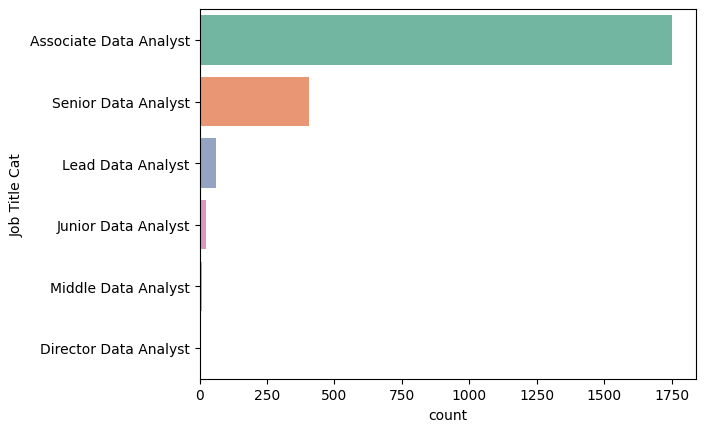

In [120]:
graf_conteo_de_valores(df,'Job Title Cat',save_image_dir=directorio_de_imagenes,save_image_file='Job_Title_Cat_1')

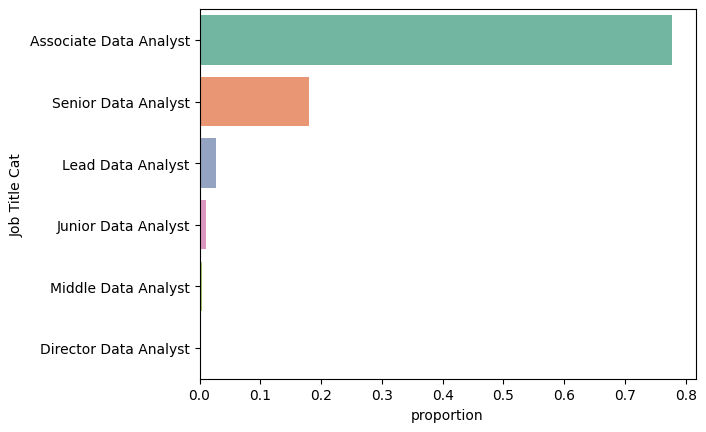

,Job Title Cat,proportion
0,Associate Data Analyst,0.777186
1,Senior Data Analyst,0.179760
2,Lead Data Analyst,0.026631
3,Junior Data Analyst,0.010652
4,Middle Data Analyst,0.003551
5,Director Data Analyst,0.002219


In [121]:
graf_conteo_de_valores(df,'Job Title Cat',save_image_dir=directorio_de_imagenes,save_image_file='Job_Title_Cat_1',normalize=True,return_value=True)

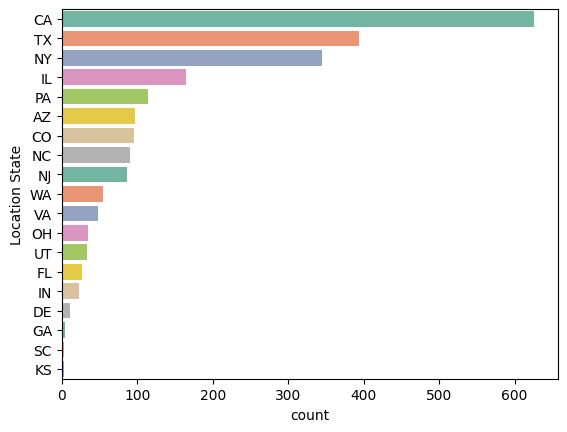

In [122]:
graf_conteo_de_valores(df,'Location State',save_image_dir=directorio_de_imagenes,save_image_file='Location_State_1')

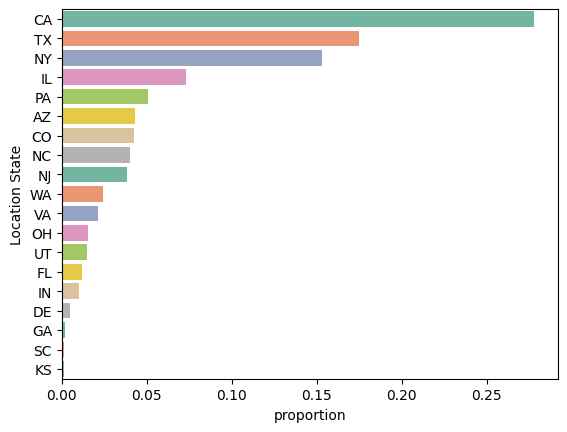

,Location State,proportion
0,CA,0.277852
1,TX,0.174878
2,NY,0.153129
3,IL,0.072792
4,PA,0.050599
5,AZ,0.043054
6,CO,0.042610
7,NC,0.039947
8,NJ,0.038171
9,WA,0.023968


In [123]:
graf_conteo_de_valores(df,'Location State',save_image_dir=directorio_de_imagenes,save_image_file='Location_State_1',normalize=True,return_value=True)

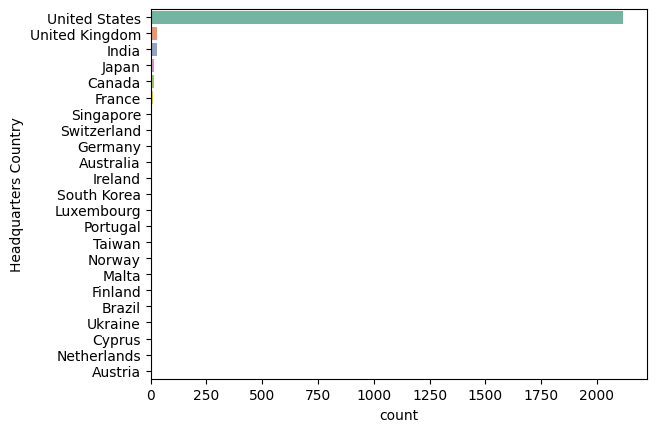

In [124]:
graf_conteo_de_valores(df,'Headquarters Country',save_image_dir=directorio_de_imagenes,save_image_file='Headquarters_Country_1')

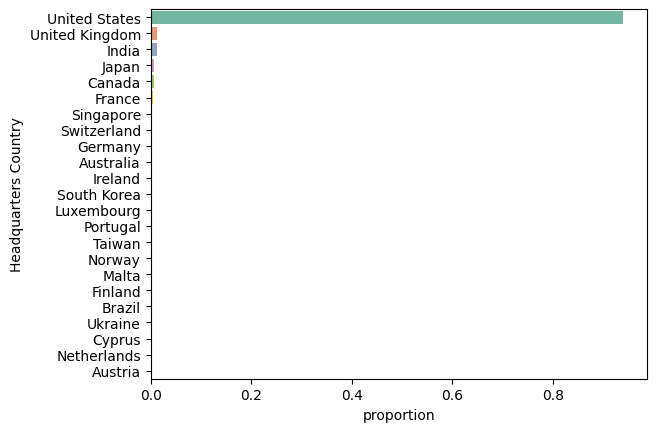

,Headquarters Country,proportion
0,United States,0.939636
1,United Kingdom,0.012872
2,India,0.011984
3,Japan,0.006214
4,Canada,0.005770
5,France,0.005326
6,Singapore,0.003107
7,Switzerland,0.003107
8,Germany,0.002219
9,Australia,0.001775


In [125]:
graf_conteo_de_valores(df,'Headquarters Country',save_image_dir=directorio_de_imagenes,save_image_file='Headquarters_Country_1',normalize=True,return_value=True)

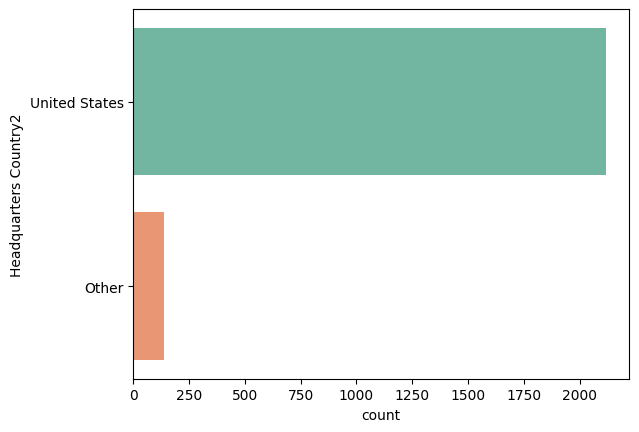

In [126]:
graf_conteo_de_valores(df,'Headquarters Country2',save_image_dir=directorio_de_imagenes,save_image_file='Headquarters_Country2_1')

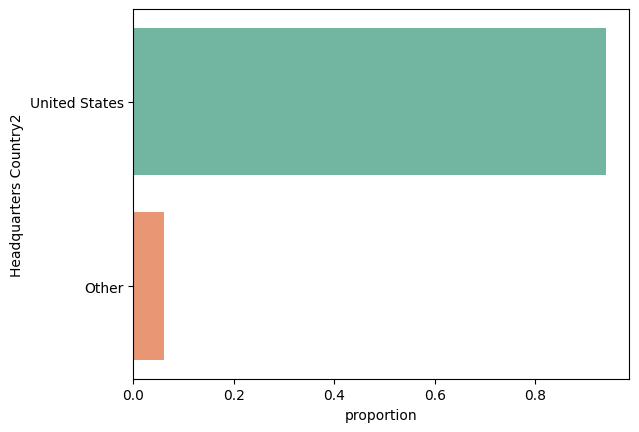

,Headquarters Country2,proportion
0,United States,0.939636
1,Other,0.060364


In [127]:
graf_conteo_de_valores(df,'Headquarters Country2',save_image_dir=directorio_de_imagenes,save_image_file='Headquarters_Country2_1',normalize=True,return_value=True)

# Guardamos los datos preprocesados

In [128]:
df.to_csv(f'{directorios_de_datos}/DataAnalyst_preprocesado_reduced_cardinality.csv', index=False)